#3강 머신러닝
지난 시간에는 비지도 학습으로 군집화를 해보았습니다.<br>
이번 시간에는 머신러닝의 대표적인 방법인 지도 학습을 알아보도록 하겠습니다.<br>
<br>
지도 학습(Supervised Learning)은 비지도 학습과 다르게 **정답 레이블(Label)**이 있습니다.<br>
주어진 데이터를 기반으로 정답 레이블을 잘 맞히도록 가중치를 학습하는 과정을 **지도 학습**이라고 할 수 있습니다.<br>
지도 학습은 또 크게 2가지 문제로 나뉩니다. 바로 **분류(Classification)**와 **회귀(Regression)**입니다.<br>
분류는 범주형 데이터를 예측하는 것, 회귀는 연속형 데이터를 예측하는 것으로 생각하면 쉽습니다.<br>
오늘 진행할 과제는 **축구 선수들의 능력치로 포지션을 예측**하는 분류 문제입니다.<br>
<br>
**3주차 학습 목표**
1. 학습 데이터 전처리
2. Scikit-Learn 라이브러리 활용법
3. 파이프라인 생성 후 학습
4. 모델 평가(Metric)
5. 하이퍼 파라미터 튜닝

In [ ]:
# 기본적으로 필요한 시각화 라이브러리를 불러오기
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 설정

# Seaborn에서 기본 스타일을 지정할 수 있습니다.
sns.set_style('whitegrid')

## 데이터 전처리

In [ ]:
# Pandas 및 정규표현식 불러오기
import pandas as pd
import re

In [ ]:
path = '/content/drive/MyDrive/[deep daiv.] 머신러닝 입문/[deep daiv.] 머신러닝 3주차/'
df = pd.read_csv(path + 'FIFA22_official_data.csv', encoding = 'utf-8'); df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


In [ ]:
# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [ ]:
# 포지션 예측을 위한 컬럼 확인
df[['Name','Position','Best Position']]

,Name,Position,Best Position
0,Bruno Fernandes,"<span class=""pos pos18"">CAM",CAM
1,L. Goretzka,"<span class=""pos pos11"">LDM",CM
2,L. Suárez,"<span class=""pos pos24"">RS",ST
3,K. De Bruyne,"<span class=""pos pos13"">RCM",CM
4,M. Acuña,"<span class=""pos pos7"">LB",LB
...,...,...,...
16705,18 L. Clayton,"<span class=""pos pos29"">RES",GK
16706,�. Dobre,"<span class=""pos pos29"">RES",GK
16707,21 Xue Qinghao,"<span class=""pos pos29"">RES",GK
16708,A. Shaikh,"<span class=""pos pos28"">SUB",GK


In [ ]:
# 포지션 확인
print(df['Best Position'].unique(), '포지션 개수', len(df['Best Position'].unique()), '개')

['CAM' 'CM' 'ST' 'LB' 'CDM' 'CB' 'RB' 'LM' 'RW' 'LW' 'CF' 'LWB' 'RM' 'RWB'
 'GK'] 포지션 개수 15 개


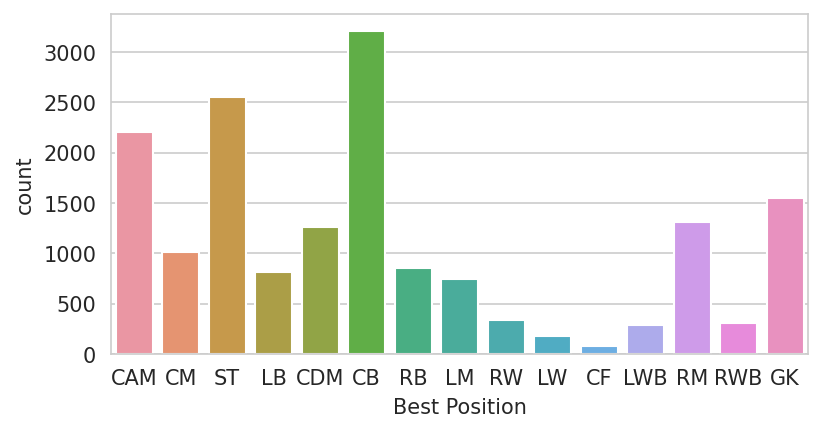

In [ ]:
# 포지션별 카운트
plt.figure(figsize = (6,3), dpi = 150)
sns.countplot(x = df['Best Position'], data = df)
plt.show()

### 레이블 인코딩

In [ ]:
# 데이터 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # 레이블 인코더는 정수 인덱스로 바꾸어줍니다. 나중에 One-hot Encoding과 비교해서 참고해보시면 좋아요.

In [ ]:
# 정답 레이블 인코딩
y = encoder.fit_transform(df['Best Position']); y # 정답 레이블을 정수 인덱스로 반환하였습니다.
# 다시 정수를 문자열로 알아보고 싶다면 encoder.inverse_transform(y)를 실행하시면 됩니다.

array([ 0,  4, 14, ...,  5,  5, 14])

### 특성(Feature) 선택

In [ ]:
# 컬럼 인덱스 확인하기
for i, v in enumerate(df.columns):
    print(i, v)

0 ID
1 Name
2 Age
3 Photo
4 Nationality
5 Flag
6 Overall
7 Potential
8 Club
9 Club Logo
10 Value
11 Wage
12 Special
13 Preferred Foot
14 International Reputation
15 Weak Foot
16 Skill Moves
17 Work Rate
18 Body Type
19 Real Face
20 Position
21 Jersey Number
22 Joined
23 Loaned From
24 Contract Valid Until
25 Height
26 Weight
27 Crossing
28 Finishing
29 HeadingAccuracy
30 ShortPassing
31 Volleys
32 Dribbling
33 Curve
34 FKAccuracy
35 LongPassing
36 BallControl
37 Acceleration
38 SprintSpeed
39 Agility
40 Reactions
41 Balance
42 ShotPower
43 Jumping
44 Stamina
45 Strength
46 LongShots
47 Aggression
48 Interceptions
49 Positioning
50 Vision
51 Penalties
52 Composure
53 Marking
54 StandingTackle
55 SlidingTackle
56 GKDiving
57 GKHandling
58 GKKicking
59 GKPositioning
60 GKReflexes
61 Best Position
62 Best Overall Rating
63 Release Clause
64 DefensiveAwareness


In [ ]:
 # 학습 데이터 생성
 x = df.iloc[:,27:61]; x

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,...,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0
1,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,...,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0
2,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,...,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0
3,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,...,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0
4,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,...,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,...,18.0,37.0,5.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0
16706,13.0,7.0,10.0,17.0,7.0,6.0,11.0,13.0,28.0,17.0,...,12.0,29.0,NaN,13.0,12.0,57.0,52.0,53.0,48.0,58.0
16707,12.0,9.0,14.0,15.0,6.0,8.0,12.0,13.0,14.0,12.0,...,15.0,17.0,NaN,11.0,9.0,49.0,48.0,45.0,38.0,52.0
16708,13.0,8.0,10.0,22.0,8.0,10.0,11.0,13.0,18.0,13.0,...,19.0,23.0,NaN,14.0,13.0,49.0,41.0,39.0,45.0,49.0


In [ ]:
# 결측치 개수 확인
x.isnull().sum()

Crossing               0
Finishing              0
HeadingAccuracy        0
ShortPassing           0
Volleys               37
Dribbling              0
Curve                 37
FKAccuracy             0
LongPassing            0
BallControl            0
Acceleration           0
SprintSpeed            0
Agility               37
Reactions              0
Balance               37
ShotPower              0
Jumping               37
Stamina                0
Strength               0
LongShots              0
Aggression             0
Interceptions          8
Positioning            8
Vision                37
Penalties              0
Composure            251
Marking            15818
StandingTackle         0
SlidingTackle         37
GKDiving               0
GKHandling             0
GKKicking              0
GKPositioning          0
GKReflexes             0
dtype: int64

In [ ]:
# 컬럼 제거
x.drop('Marking', axis = 1, inplace = True)

### 결측 데이터 보간

In [ ]:
# 결측 데이터 확인
df[df['Volleys'].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
7976,177176,09 H. de Noteboom,32,https://cdn.sofifa.com/players/177/176/09_60.png,Netherlands,https://cdn.sofifa.com/flags/nl.png,87,90,111648,https://cdn.sofifa.com/teams/111648/30.png,...,NaN,7.0,20.0,55.0,20.0,20.0,ST,89.0,NaN,NaN
9695,5003,08 Cafu,37,https://cdn.sofifa.com/players/005/003/08_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,83,88,AC Milan,https://cdn.sofifa.com/teams/47/30.png,...,NaN,13.0,22.0,59.0,22.0,22.0,CF,86.0,NaN,NaN
10673,5680,08 P. Kluivert,30,https://cdn.sofifa.com/players/005/680/08_60.png,Netherlands,https://cdn.sofifa.com/flags/nl.png,81,81,LOSC Lille,https://cdn.sofifa.com/teams/65/30.png,...,NaN,9.0,22.0,68.0,22.0,22.0,ST,81.0,NaN,NaN
10700,4738,08 A. Recoba,31,https://cdn.sofifa.com/players/004/738/08_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,86,87,Torino F.C.,https://cdn.sofifa.com/teams/54/30.png,...,NaN,6.0,22.0,66.0,22.0,22.0,CF,86.0,NaN,NaN
10993,5589,09 Figo,35,https://cdn.sofifa.com/players/005/589/09_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,78,86,Inter,https://cdn.sofifa.com/teams/44/30.png,...,NaN,6.0,22.0,76.0,22.0,22.0,CF,81.0,NaN,NaN
11062,23330,10 M. Bordon,33,https://cdn.sofifa.com/players/023/330/10_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,82,84,FC Schalke 04,https://cdn.sofifa.com/teams/34/30.png,...,NaN,6.0,21.0,72.0,21.0,21.0,CB,83.0,NaN,NaN
11881,4233,08 C. Reyna,33,https://cdn.sofifa.com/players/004/233/08_60.png,United States,https://cdn.sofifa.com/flags/us.png,76,80,New York Red Bulls,https://cdn.sofifa.com/teams/689/30.png,...,NaN,8.0,21.0,74.0,21.0,21.0,CM,77.0,NaN,NaN
12216,1615,08 L. Thuram,35,https://cdn.sofifa.com/players/001/615/08_60.png,France,https://cdn.sofifa.com/flags/fr.png,83,87,FC Barcelona,https://cdn.sofifa.com/teams/241/30.png,...,NaN,8.0,21.0,55.0,21.0,21.0,CB,83.0,NaN,NaN
12233,1249,08 E. Chiesa,36,https://cdn.sofifa.com/players/001/249/08_60.png,Italy,https://cdn.sofifa.com/flags/it.png,79,83,Siena,https://cdn.sofifa.com/teams/1838/30.png,...,NaN,8.0,21.0,52.0,21.0,21.0,ST,79.0,NaN,NaN
12247,4767,10 Emerson,33,https://cdn.sofifa.com/players/004/767/10_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,75,85,NaN,https://cdn.sofifa.com/flags/br.png,...,NaN,7.0,22.0,74.0,22.0,22.0,CDM,75.0,NaN,NaN


In [ ]:
# 결측 데이터 보간
x.interpolate(axis = 1, inplace = True)

In [ ]:
# (참고) k-NN으로 보간
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
# x = imputer.fit_transform(x)

## 포지션 분류

### 학습-훈련 데이터셋 구축
사이킷런에서 제공하는 `train_test_split`을 이용하면 편리하게 구분할 수 있습니다.<br>
test_size에는 비율만 입력하면 임의로 학습 데이터와 훈련 데이터를 분리해줍니다.<br>
직접 30%를 분리해도 괜찮지만 랜덤하게 샘플링하려면 이 방법이 훨씬 편리합니다.<br>
테스트셋의 사이즈는 보통 20~30%로 설정합니다.<br>
학습에 데이터가 부족하지는 않기 때문에 30%로 설정하였습니다.

In [ ]:
# 학습-훈련 데이터셋 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 319)

In [ ]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=100) # n_neighbors가 자신을 결정할 이웃의 수입니다. 중요한 하이퍼 파라미터입니다.
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
acc = accuracy_score(y_test,y_pred) # 정확도
print('k-NN 모델의 정확도:', '%.4f'%acc)

k-NN 모델의 정확도: 0.6860


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 데이터 정규화와 파이프 라인 설계
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_neighbors=100))
                     ])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('정규화된 k-NN 모델의 정확도:', '%.4f'%acc)

정규화된 k-NN 모델의 정확도: 0.6808


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 의사 결정 나무
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Decision Tree 모델의 정확도:', '%.4f'%acc)

Decision Tree 모델의 정확도: 0.6383


In [ ]:
# 의사 결정 나무 - 정규화
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('dt', DecisionTreeClassifier(max_depth = 10))
                     ])
pipeline.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Decision Tree 모델의 정확도:', '%.4f'%acc)

Decision Tree 모델의 정확도: 0.6383


In [ ]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 15, random_state = 319)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Ramdom Forest 모델의 정확도:', '%.4f'%acc)

Ramdom Forest 모델의 정확도: 0.7056


In [ ]:
# 랜덤 포레스트 - 정규화
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('rf', RandomForestClassifier(max_depth = 15, random_state = 319))
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Ramdom Forest 모델의 정확도:', '%.4f'%acc)

Ramdom Forest 모델의 정확도: 0.7066


In [ ]:
# XGBoost
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=15, tree_method='gpu_hist')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('XGBoost 모델의 정확도:', '%.4f'%acc)

XGBoost 모델의 정확도: 0.7233


In [ ]:
# Support Vector Machine Classifier
from sklearn.svm import SVC
svc = SVC(C =100)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Support Vector Machine 모델의 정확도:', '%.4f'%acc)

Support Vector Machine 모델의 정확도: 0.7393


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 1000))
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression 모델의 정확도:', '%.4f'%acc)

Logistic Regression 모델의 정확도: 0.7578


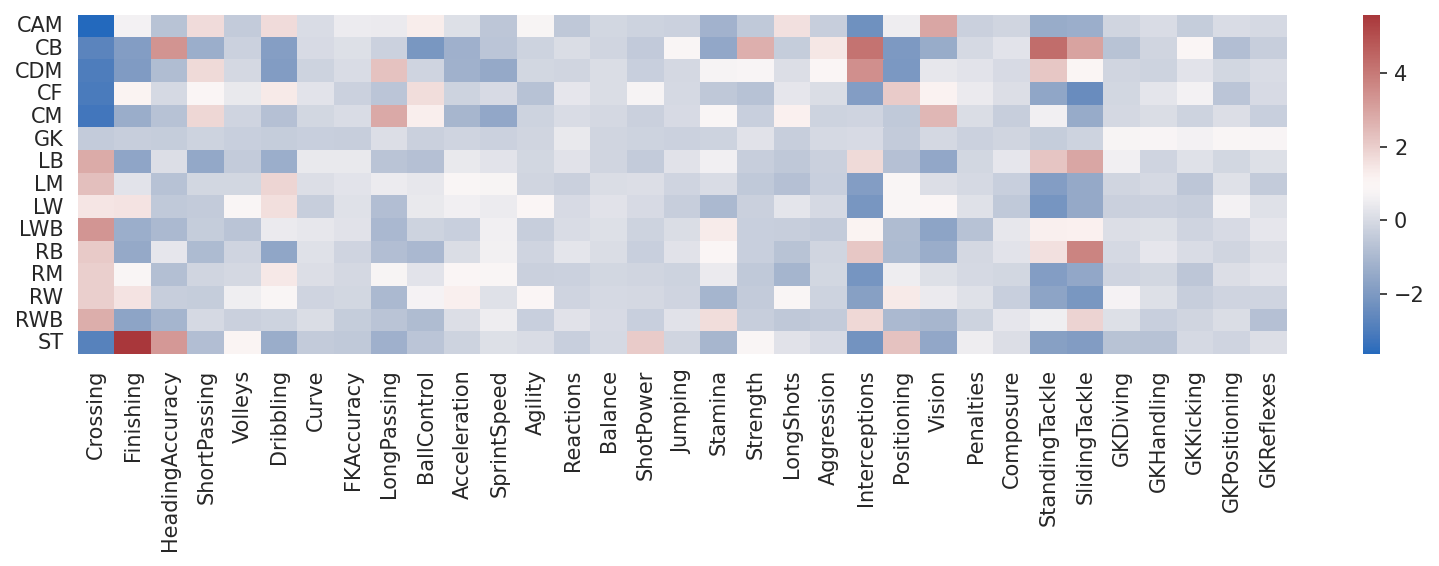

In [ ]:
# Logistic Regression의 계수
matrix = pd.DataFrame(pipeline['lr'].coef_, columns = x_train.columns, index = encoder.inverse_transform(range(15)))

plt.figure(figsize = (13,3), dpi = 150)
sns.heatmap(matrix, cmap = 'vlag')
plt.show()

In [ ]:
y_test_label = encoder.inverse_transform(y_test)
y_pred_label = encoder.inverse_transform(y_pred)

In [ ]:
# 실제 값과 예측값 비교
pred = pd.DataFrame(zip(y_test_label, y_pred_label), columns = ['test', 'pred'])
pred

,test,pred
0,RW,ST
1,CAM,CAM
2,RB,LB
3,RB,RB
4,CAM,CAM
...,...,...
5008,ST,ST
5009,LW,RW
5010,ST,ST
5011,CB,CB


In [ ]:
error = pred[pred['test'] != pred['pred']].copy()

In [ ]:
# 피벗테이블을 통해 히트맵 시각화를 위한 표 만들기
error['count'] = 1 # 이렇게 하면 count를 모두 1로 지정할 수 있습니다.
error = error.pivot_table(values = 'count', columns = 'test', index = 'pred', aggfunc = 'sum').copy(); error

test,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
pred,,,,,,,,,,,,,,
CAM,NaN,NaN,1.0,9.0,31.0,NaN,51.0,18.0,NaN,NaN,67.0,27.0,1.0,4.0
CB,NaN,NaN,26.0,NaN,1.0,10.0,NaN,NaN,NaN,12.0,NaN,NaN,2.0,1.0
CDM,3.0,21.0,NaN,NaN,39.0,8.0,2.0,NaN,1.0,6.0,NaN,NaN,6.0,NaN
CF,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
CM,30.0,1.0,33.0,NaN,NaN,NaN,1.0,NaN,1.0,3.0,8.0,NaN,3.0,1.0
LB,NaN,4.0,4.0,1.0,5.0,NaN,5.0,NaN,38.0,77.0,4.0,1.0,25.0,NaN
LM,5.0,NaN,NaN,NaN,NaN,2.0,NaN,8.0,1.0,1.0,22.0,6.0,NaN,NaN
LW,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
LWB,NaN,NaN,NaN,NaN,1.0,8.0,2.0,NaN,NaN,2.0,3.0,NaN,9.0,NaN


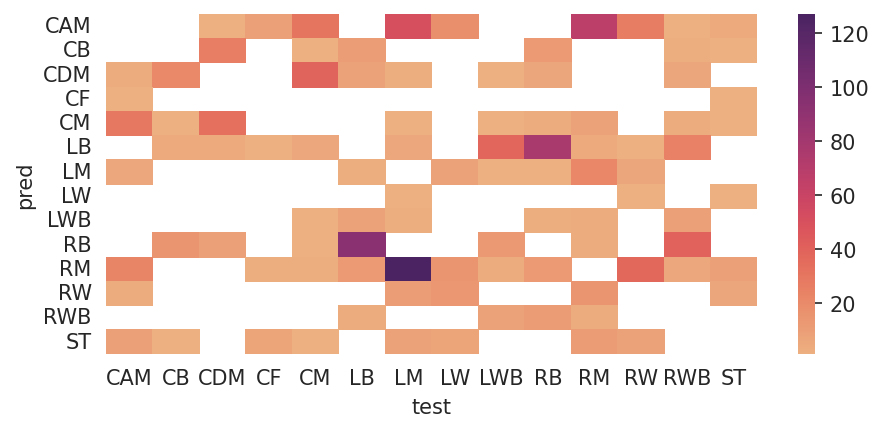

In [ ]:
# 잘못 분류된 레이블 히트맵 시각화
plt.figure(figsize = (7,3), dpi = 150)
sns.heatmap(error, cmap = 'flare')
plt.show()

In [ ]:
def error_heatmap(y_test,y_pred):    
    y_test_label = encoder.inverse_transform(y_test)
    y_pred_label = encoder.inverse_transform(y_pred)
    pred = pd.DataFrame(zip(y_test_label, y_pred_label), columns = ['test', 'pred'])

    error = pred[pred['test'] != pred['pred']].copy()
    error['count'] = 1
    error = error.pivot_table(values = 'count', columns = 'test', index = 'pred', aggfunc = 'sum').copy()

    plt.figure(figsize = (7,3), dpi = 150)
    sns.heatmap(error, cmap = 'flare')
    plt.show()

### 피처 엔지니어링
특성 공학이라고도 불리는 피처 엔지니어링(Feature Engineering)은 말 그대로 성능을 개선하기 위해 특성을 조작하는 것입니다.<br>
방법은 정말 다양한데, 지난 시간에 학습한 PCA를 활용하여 **Feature Extraction**하는 방법도 있고,<br>
특성의 일부만 활용하여 **Feature Selection**하는 방법도 있습니다.<br>
<br>
히트맵을 보니 Right와 Left를 잘 구분하지 못하는 것 같습니다.<br>
그렇다면 자주 사용하는 발 정보를 넣어주면 성능이 오르지 않을까요?<br>
이번 시간에는 간단하게 `Preferred Foot` 정보를 데이터셋에 추가해보도록 하겠습니다.

In [ ]:
# Preferred Foot 값 확인
df['Preferred Foot'].unique()

array(['Right', 'Left'], dtype=object)

In [ ]:
# 선호하는 발 특성 추가
x = pd.concat([x,df['Preferred Foot']], axis = 1)

In [ ]:
# 선호하는 발 정수 인덱싱
x['Preferred Foot'] = x['Preferred Foot'].map(lambda foot : 1 if foot == 'Right' else 0)

In [ ]:
# 새로운 결과 확인
import time

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lr', LogisticRegression(solver = 'lbfgs', max_iter = 1000))
                     ])

start = time.time()
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f"{time.time()-start:.4f} 초 소요")
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression 모델의 정확도:', '%.4f'%acc)

6.8817 초 소요
Logistic Regression 모델의 정확도: 0.7578


### 하이퍼 파라미터 튜닝
앞서 `k-NN`의 k나 `DecisionTree`의 max_depth와 같은 값은 모델의 결과에 큰 영향을 미칠 수 있는 중요한 하이퍼 파라미터입니다.<br>
최적의 하이퍼 파라미터를 찾기 위한 방법론들이 있지만, 가장 좋은 방법은 직접 다 넣어보는 것입니다!<br>
쉽게 하이퍼 파라미터에 따른 결과를 비교해볼 수 있도록 사이킷런에서는 `GridSearch`를 제공하고 있습니다.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 319)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 모델 파이프라인 설정
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lr', LogisticRegression(max_iter = 1000))
                     ])

In [ ]:
# 하이퍼 파라미터 설정
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# GridSearch 적용
grid = dict(lr__solver = solvers, lr__C = c_values)

In [ ]:
# CrossValidation 설정
cv = StratifiedKFold(n_splits=3, random_state = 319, shuffle = True)

In [ ]:
# GridSearchCV 학습
grid_search = GridSearchCV(estimator=pipeline, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(x_train, y_train)

In [ ]:
# 결과 요약
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.799008 using {'lr__C': 1.0, 'lr__solver': 'newton-cg'}
0.797897 (0.000209) with: {'lr__C': 100, 'lr__solver': 'newton-cg'}
0.797726 (0.000320) with: {'lr__C': 100, 'lr__solver': 'lbfgs'}
0.759255 (0.002668) with: {'lr__C': 100, 'lr__solver': 'liblinear'}
0.797640 (0.000209) with: {'lr__C': 100, 'lr__solver': 'sag'}
0.797726 (0.000242) with: {'lr__C': 100, 'lr__solver': 'saga'}
0.798239 (0.000320) with: {'lr__C': 10, 'lr__solver': 'newton-cg'}
0.798239 (0.000121) with: {'lr__C': 10, 'lr__solver': 'lbfgs'}
0.759255 (0.002585) with: {'lr__C': 10, 'lr__solver': 'liblinear'}
0.798324 (0.000121) with: {'lr__C': 10, 'lr__solver': 'sag'}
0.798153 (0.000363) with: {'lr__C': 10, 'lr__solver': 'saga'}
0.799008 (0.002098) with: {'lr__C': 1.0, 'lr__solver': 'newton-cg'}
0.799008 (0.002098) with: {'lr__C': 1.0, 'lr__solver': 'lbfgs'}
0.758913 (0.002770) with: {'lr__C': 1.0, 'lr__solver': 'liblinear'}
0.798923 (0.002304) with: {'lr__C': 1.0, 'lr__solver': 'sag'}
0.798923 (0.002304) with: {'lr

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([26.52822383, 10.19597586,  2.61608728, 15.86447152, 29.48102395,
         4.88461677,  8.14855917,  2.23805181, 11.42330734, 22.8983922 ,
         2.70932086,  3.9955314 ,  2.14493974,  6.24830977, 13.66712181,
         1.97945579,  2.13496884,  1.57080921,  2.59397713,  5.80704331,
         1.36298974,  1.2861193 ,  1.10209759,  0.82887562,  1.95781612]),
 'std_fit_time': array([6.89712137, 2.35416658, 0.07041026, 2.06343731, 1.07546125,
        0.42288414, 1.61110158, 0.02200778, 0.18778878, 0.93086233,
        0.21296616, 0.64195878, 0.07721116, 1.0669799 , 0.75877764,
        0.02425754, 0.06666695, 0.08516778, 0.19053086, 0.7516863 ,
        0.06600733, 0.06035321, 0.08053857, 0.02911633, 0.45729751]),
 'mean_score_time': array([0.00748889, 0.00515922, 0.00545478, 0.00512751, 0.00680923,
        0.00535599, 0.00601117, 0.00545001, 0.00518314, 0.00521962,
        0.00493153, 0.00512306, 0.00920161, 0.00501339, 0.00518211,
        0.00500743, 0.00504915, 0.0

In [ ]:
# 최적의 하이퍼 파라미터 설정 후 학습
start = time.time()
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lr', LogisticRegression(solver = 'newton-cg', C = 1))
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f"{time.time()-start:.4f} 초 소요")
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression 모델의 정확도:', '%.4f'%acc)

4.4522 초 소요
Logistic Regression 모델의 정확도: 0.8129


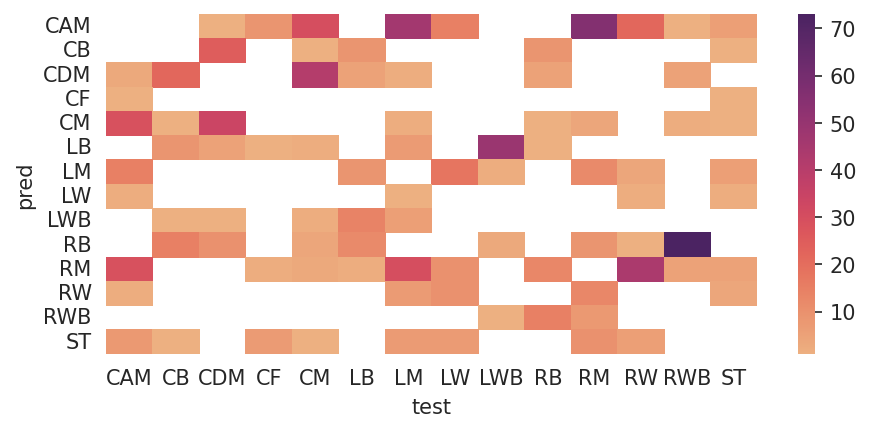

In [ ]:
error_heatmap(y_test, y_pred)

In [ ]:
rb_df = df[df['Best Position'] == 'RB'].iloc[:,27:61].copy()

In [ ]:
rwb_df = df[df['Best Position'] == 'RWB'].iloc[:,27:61].copy()

In [ ]:
rb_df.describe() - rwb_df.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,...,546.000000,547.000000,12.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,-0.177058,-1.286908,4.375686,-0.823885,-0.277193,-1.524623,-0.541242,-0.094581,-1.059414,-0.656874,...,1.065571,0.007329,-1.237154,1.484165,1.808781,-0.175724,0.365941,0.229748,-0.149465,0.355502
std,1.127966,0.891334,-0.227897,1.848054,0.316160,1.402538,2.097218,0.261910,1.938789,1.138023,...,0.292720,0.703201,-4.266491,0.143459,0.149987,0.025960,0.116087,0.111802,-0.020999,-0.075555
min,-11.000000,0.000000,-10.000000,-10.000000,0.000000,-14.000000,-6.000000,-8.000000,-4.000000,-9.000000,...,-9.000000,-18.000000,7.000000,-3.000000,-4.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-1.000000,-2.000000,4.000000,-1.000000,0.000000,-1.000000,-4.000000,-1.000000,-1.000000,0.000000,...,1.000000,0.000000,0.500000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,-2.500000,4.000000,0.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,...,1.000000,0.000000,-3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
75%,0.000000,0.000000,4.000000,1.000000,0.000000,-1.000000,2.000000,2.000000,1.000000,0.000000,...,2.000000,1.000000,-2.000000,2.000000,3.000000,0.000000,0.250000,0.000000,0.000000,0.000000
max,5.000000,6.000000,8.000000,0.000000,5.000000,8.000000,5.000000,10.000000,12.000000,0.000000,...,-3.000000,-9.000000,-10.000000,-3.000000,-9.000000,0.000000,3.000000,2.000000,2.000000,-2.000000


### (개인 실습)

In [ ]:
x = pd.concat([x,df[['Overall', 'Potential']]], axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 319)

In [ ]:
start = time.time()
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lr', LogisticRegression(solver = 'newton-cg', C = 1))
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f"{time.time()-start:.4f} 초 소요")
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression 모델의 정확도:', '%.4f'%acc)

5.1072 초 소요
Logistic Regression 모델의 정확도: 0.8276


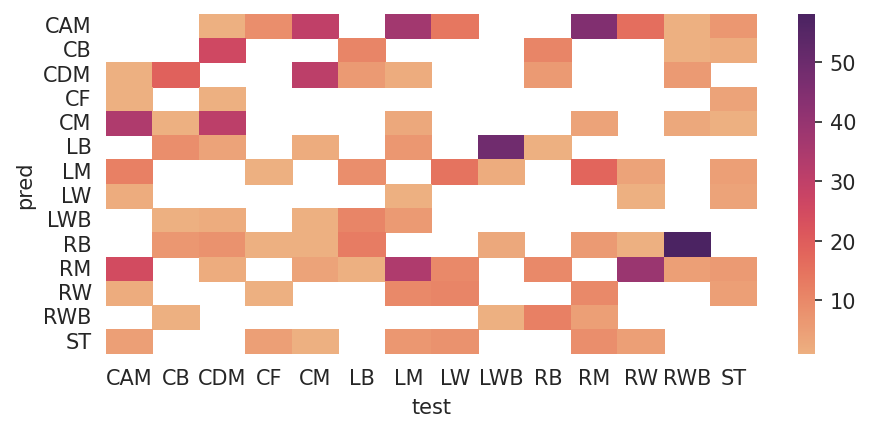

In [ ]:
error_heatmap(y_test, y_pred)

## 선수 가치 예측

In [ ]:
df['Release Clause'] = df['Release Clause'].fillna('0'); df['Release Clause']

0        €206.9M
1        €160.4M
2         €91.2M
3        €232.2M
4         €77.7M
          ...   
16705      €238K
16706      €279K
16707      €223K
16708      €259K
16709          0
Name: Release Clause, Length: 16710, dtype: object

In [ ]:
df['Release Clause'] = df['Release Clause'].map(lambda x : re.sub('[€]','',x))
df['Release Clause'] = df['Release Clause'].map(lambda x : float(re.sub('[^\.\d]','',x)) * 1000 if 'M' in x
                                                else float(re.sub('[^\.\d]','',x)))

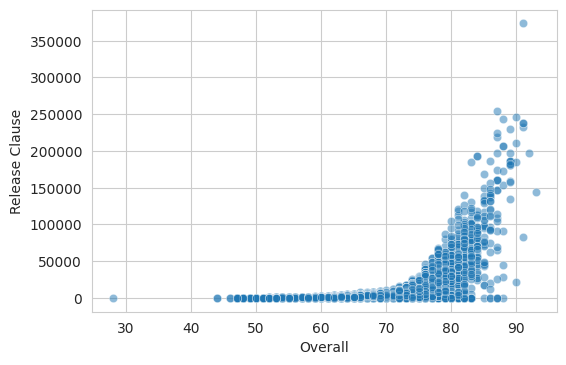

In [ ]:
plt.figure(dpi = 100)
sns.scatterplot(x = 'Overall', y = 'Release Clause', data = df, alpha = 0.5)
plt.show()

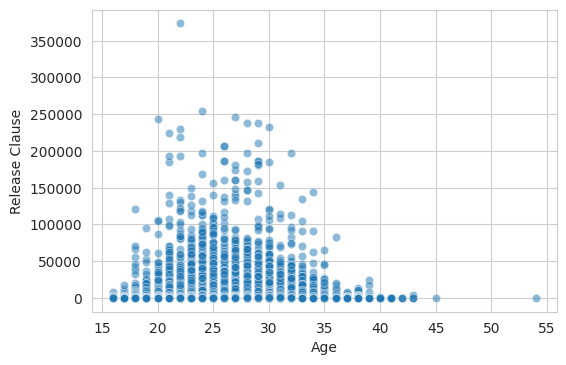

In [ ]:
plt.figure(dpi = 100)
sns.scatterplot(x = 'Age', y = 'Release Clause', data = df, alpha = 0.5)
plt.show()

In [ ]:
import numpy as np
df['Release Clause'] = df['Release Clause'].replace(0, np.nan)

In [ ]:
reg_df = df.dropna(subset = ['Release Clause']).copy()

In [ ]:
x = reg_df.iloc[:,27:61]
x = pd.concat([reg_df[['Age','Overall','Potential']], x], axis = 1)

In [ ]:
x.drop('Marking', axis = 1, inplace = True); x

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,26,88,89,87.0,83.0,64.0,91.0,87.0,83.0,87.0,...,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0
1,26,87,88,75.0,82.0,86.0,86.0,69.0,84.0,76.0,...,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0
2,34,88,88,80.0,93.0,84.0,83.0,90.0,83.0,86.0,...,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
3,30,91,91,94.0,82.0,55.0,94.0,82.0,88.0,85.0,...,94.0,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0
4,29,84,84,87.0,66.0,58.0,82.0,68.0,87.0,88.0,...,82.0,76.0,87.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,20,58,69,8.0,9.0,11.0,23.0,7.0,11.0,11.0,...,27.0,7.0,29.0,12.0,10.0,59.0,60.0,56.0,55.0,61.0
16705,17,53,70,12.0,5.0,13.0,18.0,7.0,12.0,11.0,...,29.0,18.0,37.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0
16706,20,53,63,13.0,7.0,10.0,17.0,7.0,6.0,11.0,...,33.0,12.0,29.0,13.0,12.0,57.0,52.0,53.0,48.0,58.0
16707,19,47,60,12.0,9.0,14.0,15.0,6.0,8.0,12.0,...,18.0,15.0,17.0,11.0,9.0,49.0,48.0,45.0,38.0,52.0


In [ ]:
y = df.dropna(subset = ['Release Clause'])['Release Clause'].copy(); y

0        206900.0
1        160400.0
2         91200.0
3        232200.0
4         77700.0
           ...   
16704       656.0
16705       238.0
16706       279.0
16707       223.0
16708       259.0
Name: Release Clause, Length: 14961, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 319)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin = LinearRegression()
lin.fit(x_train, y_train)
y_pred = lin.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', np.round(mse, 4), 'RMSE:', np.round(rmse, 4))
print('R2:', np.round(r2, 4))

MSE: 166332985.8464 RMSE: 12897.0146
R2: 0.4215


In [ ]:
from sklearn.svm import SVR
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svr', SVR())
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', np.round(mse, 4), 'RMSE:', np.round(rmse, 4))
print('R2:', np.round(r2, 4))

MSE: 302592457.0213 RMSE: 17395.1849
R2: -0.0523


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('knnrg', KNeighborsRegressor())
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', np.round(mse, 4), 'RMSE:', np.round(rmse, 4))
print('R2:', np.round(r2, 4))

MSE: 49719248.2207 RMSE: 7051.1877
R2: 0.8271


In [ ]:
from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('dtrg', DecisionTreeRegressor())
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', np.round(mse, 4), 'RMSE:', np.round(rmse, 4))
print('R2:', np.round(r2, 4))

MSE: 19400831.7492 RMSE: 4404.6375
R2: 0.9325


In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('rfrg', RandomForestRegressor())
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', np.round(mse, 4), 'RMSE:', np.round(rmse, 4))
print('R2:', np.round(r2, 4))

MSE: 9007227.7209 RMSE: 3001.2044
R2: 0.9687


In [ ]:
from xgboost import XGBRegressor
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('xgbr', XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0,objective='reg:squarederror',
                                           subsample=0.75, colsample_bytree=1, max_depth=15, random_state = 319))
                     ])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', np.round(mse, 4), 'RMSE:', np.round(rmse, 4))
print('R2:', np.round(r2, 4))

MSE: 7308772.3095 RMSE: 2703.4741
R2: 0.9746
